In [ ]:
import intake
import xarray as xr
import regionmask
import matplotlib.pyplot as plt
from xmip.preprocessing import combined_preprocessing
import numpy as np
import dask
from xmip.regionmask import merged_mask

basins = regionmask.defined_regions.natural_earth_v4_1_0.ocean_basins_50

<GeoAxesSubplot:>

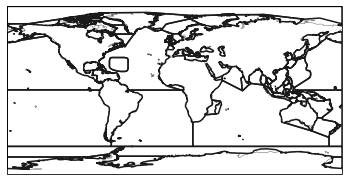

In [ ]:
basins = regionmask.defined_regions.natural_earth_v4_1_0.ocean_basins_50
# basins = regionmask.defined_regions.natural_earth.ocean_basins_50
basins.plot(add_ocean=False, add_label=False)

In [ ]:
import glob
import os

# print(os.path.basename(your_path))

In [33]:
thetaofiles = glob.glob('./thetao-models-1990-2000/*.nc')
thetaofiles

['./thetao-models-1990-2000/_CMCC-ESM2_historical_1990-2000.nc',
 './thetao-models-1990-2000/_ACCESS-CM2_historical_1990-2000.nc',
 './thetao-models-1990-2000/_CAMS-CSM1-0_historical_1990-2000.nc',
 './thetao-models-1990-2000/_MPI-ESM1-2-LR_historical_1990-2000.nc',
 './thetao-models-1990-2000/_ACCESS-ESM1-5_historical_1990-2000.nc',
 './thetao-models-1990-2000/_CMCC-CM2-SR5_historical_1990-2000.nc']

In [26]:
areacellofiles = glob.glob('./areacello-multimodel/*.nc')
areacellofiles

['./areacello-multimodel/_CMIP.ACCESS-ESM1-5.historical.Ofx.gn_areacello-historical_1990-2000.nc',
 './areacello-multimodel/_CMIP.CMCC-ESM2.historical.Ofx.gn_areacello-historical_1990-2000.nc',
 './areacello-multimodel/_CMIP.CMCC-CM2-HR4.historical.Ofx.gn_areacello-historical_1990-2000.nc',
 './areacello-multimodel/_CMIP.ACCESS-CM2.historical.Ofx.gn_areacello-historical_1990-2000.nc',
 './areacello-multimodel/_CMIP.MPI-ESM1-2-LR.historical.Ofx.gn_areacello-historical_1990-2000.nc',
 './areacello-multimodel/_CMIP.CMCC-CM2-SR5.historical.Ofx.gn_areacello-historical_1990-2000.nc']

In [35]:
thetaofiles_data = xr.open_dataset(thetaofiles[0])

thetaofiles_data

<xarray.Dataset>
Dimensions:        (member_id: 1, lev: 50, x: 292, y: 362, bnds: 2, vertex: 4)
Coordinates:
  * lev            (lev) float64 0.5126 1.621 2.858 ... 5.498e+03 5.904e+03
    lev_bounds     (lev, bnds) float64 ...
  * x              (x) int32 0 1 2 3 4 5 6 7 ... 284 285 286 287 288 289 290 291
  * y              (y) int32 0 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360 361
    lat            (x, y) float64 ...
    lon            (x, y) float64 ...
    lat_verticies  (x, y, vertex) float64 ...
    lon_verticies  (x, y, vertex) float64 ...
    lon_bounds     (bnds, x, y) float64 ...
    lat_bounds     (bnds, x, y) float64 ...
  * member_id      (member_id) object 'r1i1p1f1'
Dimensions without coordinates: bnds, vertex
Data variables:
    thetao         (member_id, lev, x, y) float32 ...

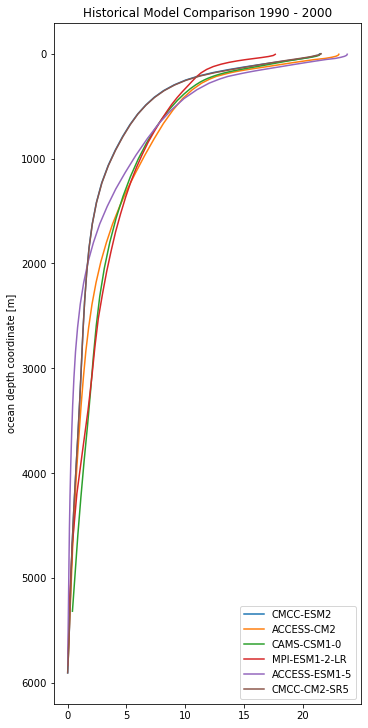

In [46]:
fig, ax = plt.subplots(1, 1,constrained_layout=True, figsize=(5,10))

legendValues = []

for thetaofile in thetaofiles:
    modelName = thetaofile.split('_')[1]
   
    for areacellofile in areacellofiles:
            thetao_dataset = xr.open_dataset(thetaofile)
            areacello_dataset = xr.open_dataset(areacellofile)
    mask = merged_mask(basins, thetao_dataset)        
    
    legendValues.append(modelName)
    
    ds_masked = thetao_dataset.where(np.logical_or(np.logical_or(mask == 2, mask==3),mask==4))
    area_masked = areacello_dataset.where(np.logical_or(np.logical_or(mask == 2, mask==3),mask==4))
    
    yy = (ds_masked.thetao[0,:,:,:] * area_masked.areacello[0,:,:]).sum(['x', 'y'])/area_masked.areacello[0,:,:].sum(['x', 'y'])
    yy.compute()
    
    yy.plot(y='lev', ax=ax, add_legend=True)
    
    plt.legend(legendValues, loc='lower right')
    
    plt.title('Historical Model Comparison 1990 - 2000')
    
plt.gca().invert_yaxis()
    